In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt

In [113]:
import pysal
import numpy as np
np.random.seed(12345)
from pysal.esda.getisord import G


In [114]:
from pysal.esda.getisord import G
from pysal.esda.getisord import G_Local

In [163]:
nx = 10
w=pysal.lat2W(nx,nx)

# plt.imshow(w.full()[0][:10, :10], interpolation='none')
# plt.colorbar()

In [164]:
x,y=np.indices((nx,nx))
x.shape=(nx**2,1)
y.shape=(nx**2,1)
data=np.hstack([x,y])
# w = pysal.Kernel(data, fixed = False, function = 'gaussian')

# plt.imshow(kw.full()[0][:10, :10], interpolation='none')
# plt.colorbar()

# w = pysal.threshold_binaryW_from_array(data, 2)
w = pysal.weights.Distance.DistanceBand(data, 1)
print w.neighbors[1], '\t', w.weights[1]

[ 0  2 11] 	[1.0, 1.0, 1.0]


In [165]:
y=np.ones(nx**2)
y[0:nx**2/2]=0

g = G(y, w)

print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Getis and Ord’s G : 0.0694, (z_sim=11.4813, p_z_sim=0.0010) 


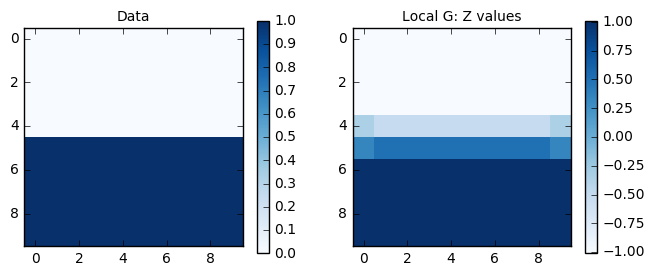

In [166]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

y = y.reshape(nx,nx)
plt.figure(1, figsize = (12,3))
ax = plt.subplot(131)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.colorbar()
plt.title('Data', fontsize = 10)
ax = plt.subplot(132)
plt.title('Local G: Z values', fontsize = 10)
plt.imshow(lg.Zs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()

In [167]:
import scipy as sp

def build_checkerboard(w, h) :
    re = np.r_[ w*[0,1] ]              # even-numbered rows
    ro = np.r_[ w*[1,0] ]              # odd-numbered rows
    return np.row_stack(h*(re, ro))

y = build_checkerboard(nx/2, nx/2) + sp.randn(nx, nx)/100.

g = G(y, w)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Getis and Ord’s G : 0.0001, (z_sim=-12.2612, p_z_sim=0.0010) 


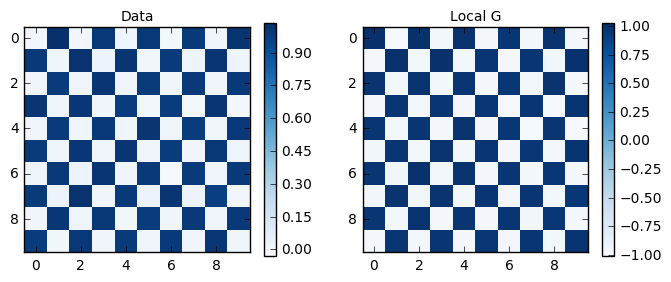

In [168]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)
y = y.reshape(nx,nx)

plt.figure(1, figsize = (8,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Zs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()

## Noise

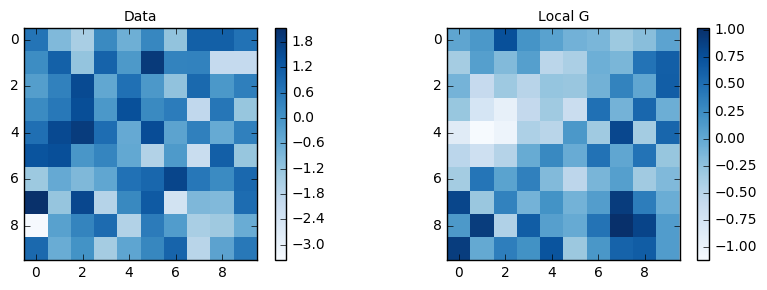

In [245]:
y = sp.randn(nx, nx) 
#  y= y.astype(int)
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lgstar.Zs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')

In [246]:
g = G(y, w)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)


Getis and Ord’s G : 0.3923, (z_sim=1.3772, p_z_sim=0.0820) 


### Gaussian

In [247]:
from  scipy.ndimage.filters import gaussian_filter

y = sp.randn(nx, nx) 
z =  gaussian_filter(y, 3, order=2, output=None, mode='reflect', cval=0.0, truncate=20.0)


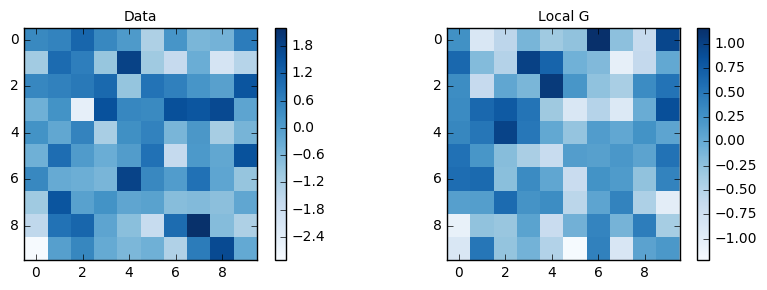

In [249]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Zs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')

In [250]:
g = G(y, w)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

g = G(z, w)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Getis and Ord’s G : 0.0534, (z_sim=0.0952, p_z_sim=0.4390) 
Getis and Ord’s G : -2.6960, (z_sim=-10.4042, p_z_sim=0.0010) 


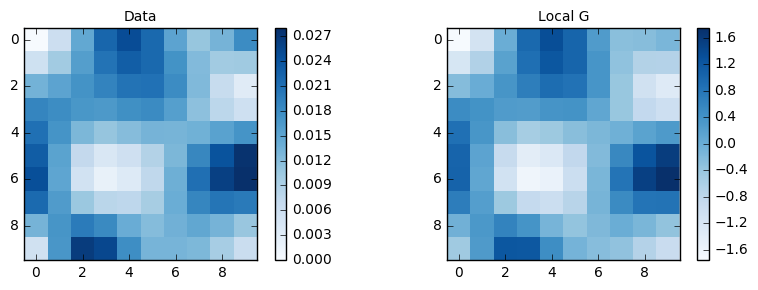

In [253]:
y = sp.randn(nx, nx) + 2
y[y<0] = 0
z =  gaussian_filter(y, 2, order=2, output=None, mode='reflect', cval=0.0, truncate=20.0)
z = z- np.unique(z)[0]
w = pysal.weights.Distance.DistanceBand(data, 1) 

lg = G_Local(z, w)
lgstar = G_Local(z, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(z, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
#plt.imshow((lg.Gs.reshape((nx,nx)) - lg.EG_sim)/lg.VG_sim, cmap = 'Blues', interpolation='none')
plt.imshow(lgstar.Zs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')